In [ ]:
import omdb
import pandas as pd
import urllib.request, urllib.parse, urllib.error
import json
import csv
import time
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import datasets, linear_model
from scipy import special, optimize
import numpy as np
from scipy.optimize import curve_fit

lrom=['0120338','0099653','0100405','1000774']
lact=['1300854','1074638','0468569','2488496','2975590']
lhor=['0070047','0298130','0816711','0289765']
lfam=['2294629','2293640','2277860','3469046','0110357']
ldra=['0120338','2322441','0109830','0398808','0119643']

roms=pd.read_hdf('RomDB.h5', 'key')
acts=pd.read_hdf('ActDB.h5', 'key')
dras=pd.read_hdf('DraDB.h5', 'key')
hors=pd.read_hdf('HorDB.h5', 'key')
fams=pd.read_hdf('FamDB.h5', 'key')


movdb=pd.read_hdf('movbaseA.h5', 'imdb_id')
movdb=movdb.reset_index()



In [12]:
test={'1300854':acts['1300854'],'1074638':acts['1074638'],'0468569':acts['0468569'],'2488496':acts['2488496']}
acts=pd.Panel(test)

In [13]:
roms.dropna(axis=1, inplace=True)
acts.dropna(axis=1, inplace=True)
dras.dropna(axis=1, inplace=True)
fams.dropna(axis=1, inplace=True)
hors.dropna(axis=1, inplace=True)


In [77]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from stop_words import get_stop_words
en_stop = get_stop_words('en')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for ii in range(len(lrom)):
    
    # clean and tokenize document string
    whole_movie_str = " ".join(acts[lact[ii]]['Line'].values)
    raw = whole_movie_str.lower()

    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    stemmed_tokens = list(filter(lambda x: len(x) > 5,stemmed_tokens))
    
    # add tokens to list
    texts.append(stemmed_tokens)

ACTt=list(itertools.chain.from_iterable(texts))
counterACT = collections.Counter(ACTt)
    
from gensim import corpora, models
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=4, num_words=4))



In [79]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from stop_words import get_stop_words
en_stop = get_stop_words('en')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for ii in range(len(ldra)):
    
    # clean and tokenize document string
    whole_movie_str = " ".join(dras[ldra[ii]]['Line'].values)
    raw = whole_movie_str.lower()

    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    stemmed_tokens = list(filter(lambda x: len(x) > 5,stemmed_tokens))
    
    # add tokens to list
    texts.append(stemmed_tokens)
DRAt=list(itertools.chain.from_iterable(texts))
counterDRA = collections.Counter(DRAt)

from gensim import corpora, models
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=4, num_words=4))




In [81]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from stop_words import get_stop_words
en_stop = get_stop_words('en')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for ii in range(len(lhor)):
    
    # clean and tokenize document string
    whole_movie_str = " ".join(hors[lhor[ii]]['Line'].values)
    raw = whole_movie_str.lower()

    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    stemmed_tokens = list(filter(lambda x: len(x) > 5,stemmed_tokens))
    
    # add tokens to list
    texts.append(stemmed_tokens)
HORt=list(itertools.chain.from_iterable(texts))
counterHOR = collections.Counter(HORt)

from gensim import corpora, models
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=4, num_words=4))




In [83]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from stop_words import get_stop_words
en_stop = get_stop_words('en')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for ii in range(len(lrom)):
    
    # clean and tokenize document string
    whole_movie_str = " ".join(roms[lrom[ii]]['Line'].values)
    raw = whole_movie_str.lower()

    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    stemmed_tokens = list(filter(lambda x: len(x) > 5,stemmed_tokens))
    
    # add tokens to list
    texts.append(stemmed_tokens)
ROMt=list(itertools.chain.from_iterable(texts))
counterROM = collections.Counter(ROMt)

from gensim import corpora, models
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=4, num_words=4))




In [85]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from stop_words import get_stop_words
en_stop = get_stop_words('en')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for ii in range(len(lfam)):
    
    # clean and tokenize document string
    whole_movie_str = " ".join(fams[lfam[ii]]['Line'].values)
    raw = whole_movie_str.lower()

    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    stemmed_tokens = list(filter(lambda x: len(x) > 5,stemmed_tokens))
    
    # add tokens to list
    texts.append(stemmed_tokens)

FAMt=list(itertools.chain.from_iterable(texts))
counterFAM = collections.Counter(FAMt)

from gensim import corpora, models
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)
#print(ldamodel.print_topics(num_topics=4, num_words=4))




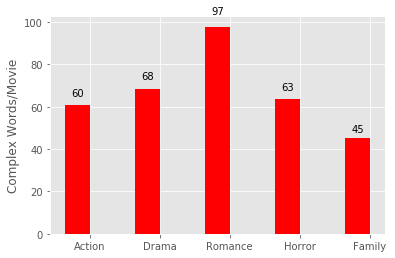

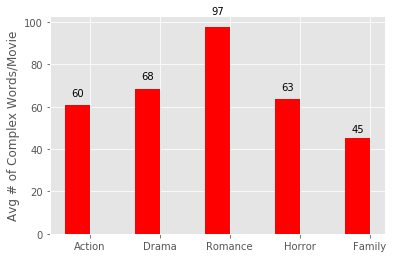

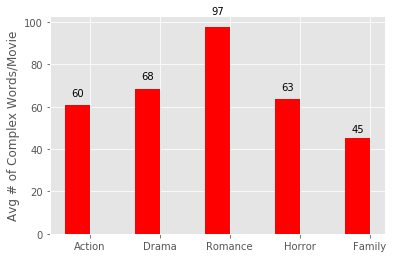

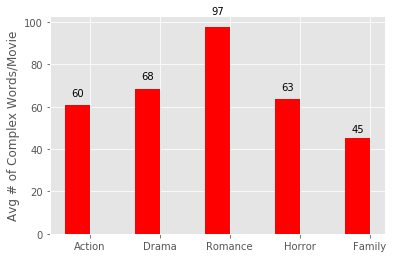

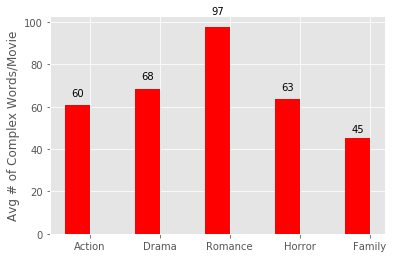

In [156]:
import numpy as np
import matplotlib.pyplot as plt


data = [('Action', int(wcomplex[1])/len(lact)), ('Drama', int(wcomplex[2])/len(ldra)),
        ('Romance', int(wcomplex[3])/len(lrom)), ('Horror', int(wcomplex[0])/len(lhor)),('Family',int(wcomplex[4])/len(lfam))]
names, values = zip(*data)  
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(data))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Avg # of Complex Words/Movie')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()

In [111]:
num=10
print(counterACT.most_common(num))
print(counterDRA.most_common(num))
print(counterROM.most_common(num))
print(counterHOR.most_common(num))
print(counterFAM.most_common(num))

[('harvey', 43), ('someth', 38), ('happen', 34), ('batman', 34), ('realli', 32), ('resist', 26), ('mandarin', 26), ('alright', 24), ('presid', 24), ('friend', 24)]
[('forrest', 64), ('someth', 51), ('realli', 47), ('shrimp', 32), ('school', 30), ('around', 29), ('thought', 27), ('everyth', 26), ('question', 26), ('dinner', 25)]
[('realli', 103), ('someth', 74), ('edward', 71), ('happen', 56), ('believ', 54), ('vivian', 43), ('everyth', 41), ('pretti', 36), ('listen', 34), ('thought', 33)]
[('someth', 44), ('father', 39), ('rachel', 37), ('realli', 36), ('lecter', 34), ('better', 28), ('understand', 28), ('doctor', 27), ('mother', 25), ('happen', 25)]
[('ingonyama', 16), ('california', 11), ('understand', 10), ('everybodi', 9), ('enamabala', 9), ('cleveland', 8), ('sigourney', 7), ('supervillain', 5), ('balthazar', 4), ('freedonia', 4)]


In [131]:
wcomplex=np.zeros(5)
i=0
for item in HORt:
    if len(item)>8:
        i=i+1
wcomplex[0]=i

i=0
for item in ACTt:
    if len(item)>8:
        i=i+1
wcomplex[1]=i

i=0
for item in DRAt:
    if len(item)>8:
        i=i+1
wcomplex[2]=i

i=0
for item in ROMt:
    if len(item)>8:
        i=i+1
wcomplex[3]=i

i=0
for item in FAMt:
    if len(item)>8:
        i=i+1
wcomplex[4]=i

254.0

In [137]:
wcomplex

array([ 254.,  304.,  342.,  391.,  225.])